In [43]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn import datasets

In [154]:
# L2 Norm Minimization
def L2_min(A, b):
    m, n = A.shape

    Q, R = np.linalg.qr(A, mode='complete')
    y = Q.T @ b
    
    x = np.linalg.solve(R[:n, :], y[:n])
    res = y[n:].sum()

    return x, res

# L1 Norm Minimization
def L1_min(A, b):
    m, n = A.shape

    i = np.eye(m)
    B1 = np.hstack((-i, A))
    B2 = np.hstack((-i, -A))
    B = np.vstack((B1, B2))

    s1 = np.ones(m)
    s2 = np.zeros(n)
    s = np.concatenate((s1, s2), axis=None)

    c = np.concatenate((b, -b), axis=None)

    bounds = [(None, None)]*(m+n)
    delta = scipy.optimize.linprog(c=s, A_ub=B, b_ub=c, bounds=bounds)
    
    res = delta.fun
    x = delta.x[m:]
    return x, res

def compare(A, b):
    l2_x, l2_res = L2_min(A, b)
    l1_x, l1_res = L1_min(A, b)

    print('Input A:\n', A, '\n', 
          '\nInput b:\n', b, '\n',
          '\nL2_min_sol:\n', l2_x, '\n',
          '\nL2_min_residual:\n', l2_res, '\n',
          '\nL1_min_sol:\n', l1_x, '\n',
          '\nL1_min_residual:\n', l1_res, '\n')


In [163]:
def outlier_gen():

    # generater 2D example - linear regression
    A, b = datasets.make_regression(n_samples=20, n_features=1, noise=15, random_state=42)
    A1 = np.ones(20)
    A1 = A1[:, None]
    A = np.hstack((A1, A))

    # outlier
    b[-1] = b[-1]+500

    # plot L1 and L2
    fig, axs = plt.subplots(2, figsize=(6, 8))

    for i in range(2):
        if i == 0:
            x, res = L1_min(A, b)
            axs[i].set_title('L1 Norm')
        else:
            x, res = L2_min(A, b)
            axs[i].set_title('L2 Norm')
        axs[i].scatter(A[:,1], b)
        
        B = np.arange(-2, 2, 0.2)
        B = B[:, None]
        B = np.hstack((A1, B))

        axs[i].plot(B[:,1], B@x)
    
    fig.tight_layout()
    plt.show()

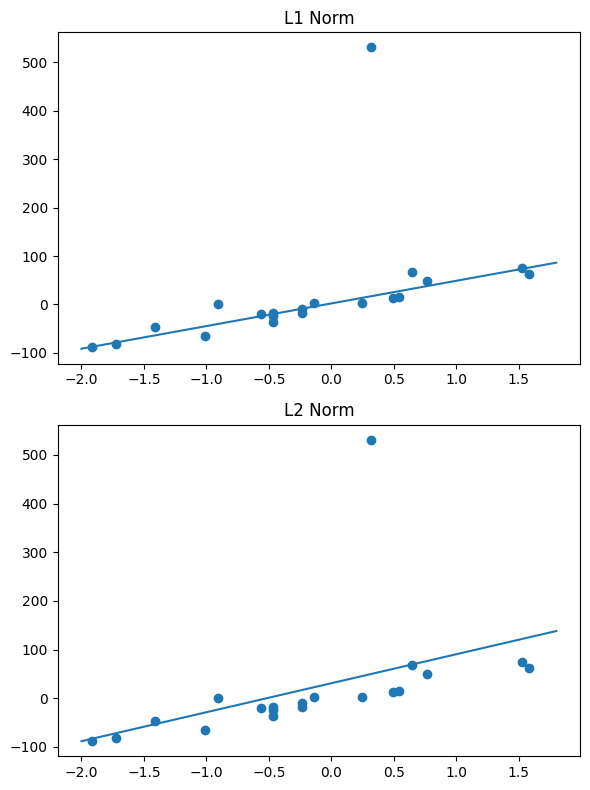

In [164]:
outlier_gen()